In [7]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed1
import matplotlib.pyplot as plt
import scipy.stats
import csv
import seaborn as sns

## *Part 1: Manipulating data*

## *1.	Add column headers to your 
## data set based on what is described in 
## adult_attributes.txt – this must be conducted programmatically.*

## Read Data and Add Header
df = pd.read_csv(r'C:\Users\Kyle\Documents\Amida\adult.csv', 
                 names=["Age", "Workclass", "fnlwgt", "Education", 
                        "Education-Num", "Marital-Status", 
                        "Occupation", "Relationship", "Race", "Sex", 
                        "Capital-Gain", "Capital-Loss", "Hours-Per-Week", "Native-Country", "Income"])


## *2.	Remove dashes in the native country names and replace with spaces.*

# remove spaces in columns name
df['Native-Country'] = df['Native-Country'].str.replace('-', ' ')

# Print Header
df.head(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
## Seeing how many Rows/Collumns there are to check the size of the data set
df.shape

(32561, 15)

In [9]:
## Looking at overall description of the data
df.describe()

,Age,fnlwgt,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
## *Part 2: Data Visualization and Analysis*

## *1.	Information about missing data (i.e., 
## how much is missing and how are these missing variables 
## represented?). What considerations should we make about missing values?*

## Answer: This is the first step to check to see if there are missing null variables. 
## Since there are none I moved on with processing the data

## Checking for Null values incase have to alter data. No Nulls found

df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Marital-Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-Gain      0
Capital-Loss      0
Hours-Per-Week    0
Native-Country    0
Income            0
dtype: int64

In [11]:
## Wanted to see the data categories of Occupation column 

df['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

<AxesSubplot:xlabel='Occupation'>

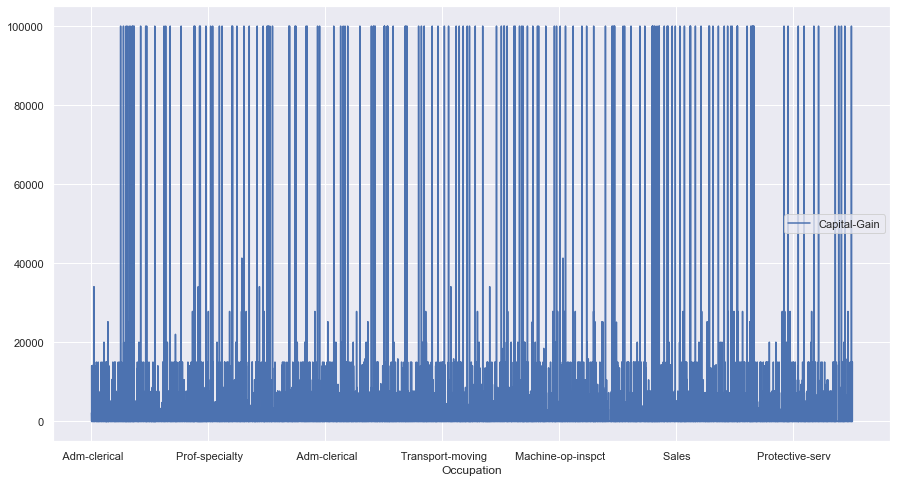

In [57]:
## Simple plot to see how I should approach and view the data. 
## This told me that there's a lot of cleaning up and rearranging of the data before I can plot

df.plot(x = 'Occupation', y = 'Capital-Gain')

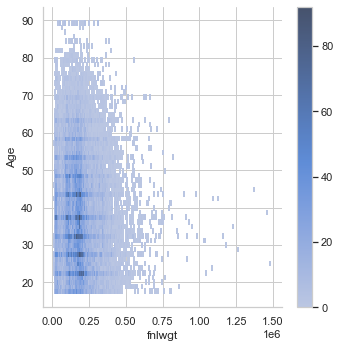

In [12]:
## Using displot distrubtion to see how Age and fnlwgt distribute against each other

## *I used this method to also check for anything that correlates or to find a linear relationship*

sns.set_theme(style="whitegrid")
sns.displot(x = df.fnlwgt, y = df.Age, cbar = True);

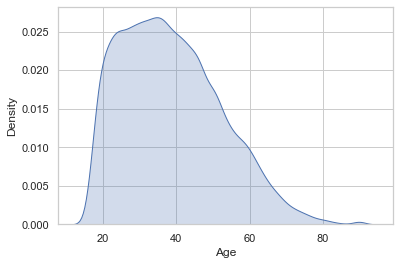

In [13]:
## Simple KDE plot of Age, wanted to see the density

## *Wanted to check the density of the age groups to figure out parameters 
## I should use to anchor the data set to. If let's say it was a small age group 
## like ages 25-30 instead of 10 to 90. That would have indicated to me I could select 
## an age group. But since the data is so large I can't and shouldn't do that.*

sns.set_theme(style="whitegrid")
sns.kdeplot(df.Age, shade = True);

#sns.lineplot(x="fnlwgt", y="Age", data=df)

C:\Users\Kyle\anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


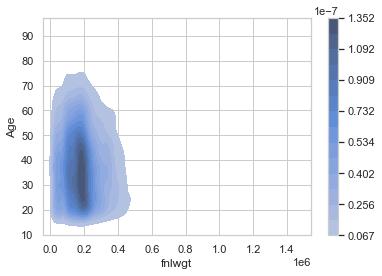

In [14]:
## Looking at fnlwgt and Age using KDE

## *This type of graph is good for checking density rings or n_levels. 
## This shows that there is really only one center of density. But this 
## graph by increasing the n_levels, if this data is far more spread out. 
## You can see more density rings. Which means there might be more variables 
## to check to find some sort of linearity*

sns.kdeplot(x = df.fnlwgt, y = df.Age, n_levels = 15, shade = True, shade_lowest = False, cbar = True);

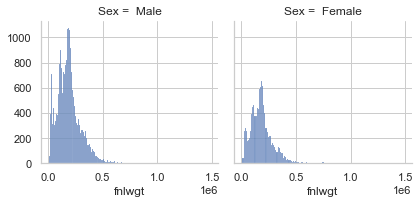

In [15]:
## Looking at fnlwgt of Male & Female. How it distributes separately

g = sns.FacetGrid(df, col = 'Sex')

g.map_dataframe(sns.histplot, 'fnlwgt');

In [16]:
## *Part 2: Data Visualization and Analysis*

## *1.	Information about missing data (i.e., 
## how much is missing and how are these missing variables 
## represented?). What considerations should we make about missing values?*

## *Answer: I wanted to come back to this question about missing values. This next 
## step as I'm separating out the data into chunks of specific plots. It's easy to view 
## certain plot combinations where there is either a lot of missing data or a vibrant 
## amount of it. What I was able to decypher from a large chunk of the data being set to 0. 
## This makes sense because when viewing the data. Not everyone has access to a high enough 
## disposable income to put away into investments and have capital gains. This would explain 
## the missing data for a lot of plots.*


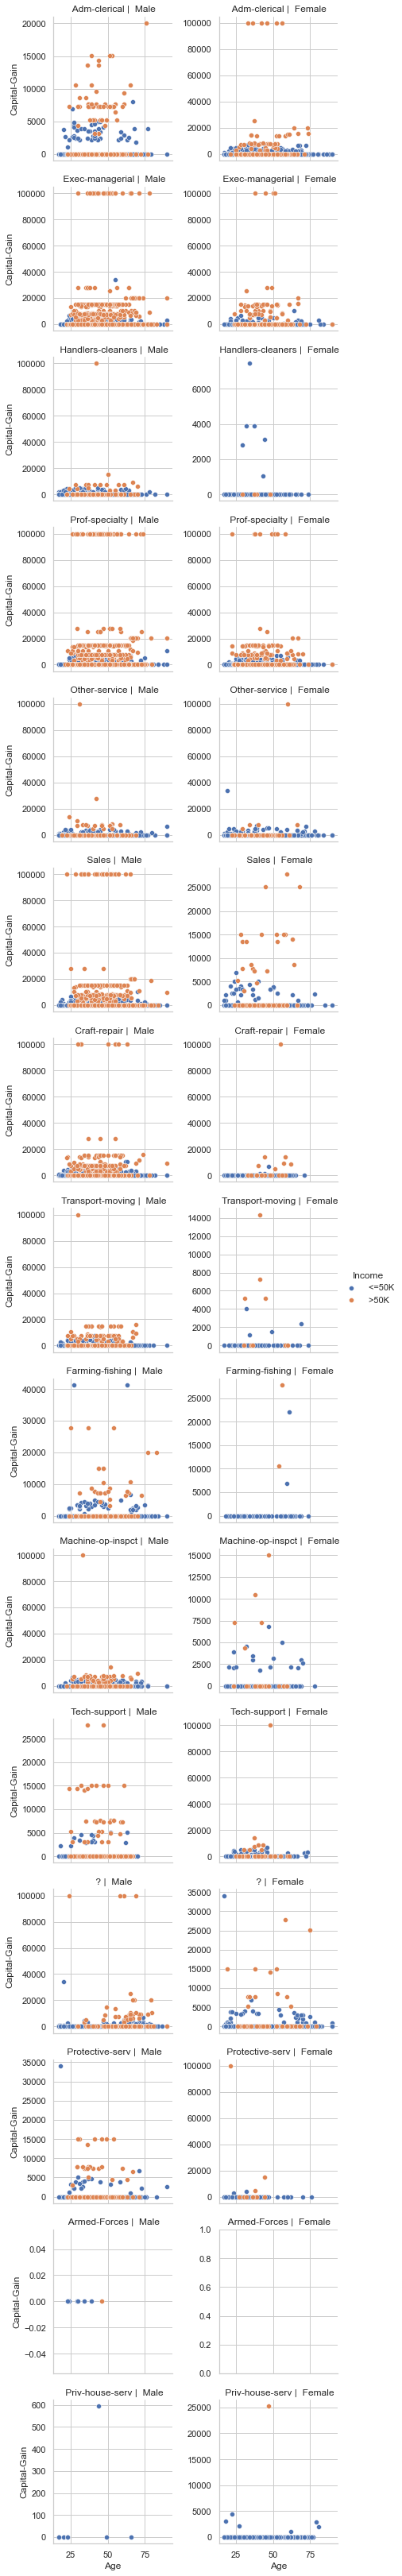

In [17]:
## Scatter plot of capital gains. Separating out categories with own plots by occupation, ...
## Income (Alternate with Region in Hue), sex, age

## *Intent of doing this was to separate out the categories to further granualize the 
## data by separating it into smaller chunks and fewer variable contstraints instead of 
## viewing it all congruently together* 

g = sns.FacetGrid(df, col = 'Sex', row = 'Occupation', hue = 'Income', sharey = False)

g.map_dataframe(sns.scatterplot, x = 'Age', y = 'Capital-Gain')
g.set_axis_labels('Age', 'Capital-Gain')
g.set_titles(col_template = '{col_name}', row_template = '{row_name}' )
g.add_legend();

In [18]:
## Function to add a group mean in the center of each plot

## *Was intending on using this function to add a mean line in 
## the center of each plot. I wasn't able to get it to work unfortunately but you can see my methods here*

def add_mean_line(data, var = None, **kws):
    #if no variable provided, skip adding mean line
    if not var: return
    
    #calculate mean for each group
    m = np.mean(data[var])
    
    #get current axis
    ax = plt.gca()
    
    #add line at group mean
    ax.axvline(m, color = 'maroon', lw = 3, ls = '--')
    
    #annote group mean
    x_pos = 0.65
    
    if m > 5000: x_pos = 0.2
    ax.text(x_pos, 0.7, f'mean={m:.0f}',
           transform = ax.transAxes,     #Transforms positions to range from (0, 0) to (1, 1)
           color = 'maroon', fontweight = 'bold', fontsize = 12)
    

In [19]:
## *Part 2: Data Visualization and Analysis*

## *2.	Overall explanatory statistics about the data 
## (e.g., quantiles, mode, mean, for numeric; histogram 
## for categorical). Where is the value in this information?*

## *Answer: The value in separating out the data like so below 
## is to help answer and better visualize the data. Everything was 
## separated out by the type of occupation, sex, and income. By 
## adding the hue to the plot. It makes it easy to disginquish the 
## overlap between the 2 different income categories. You can make 
## statements about the data.* 

## *3.	At least two visualizations that show something 
## interesting about this data set, and explain the meaning 
## or implications of these visualizations.*

## *Answer: Viewing at the bottom for male and female 
## Priv-House-Serv. There's no data for anyone above 50k in this occupations.
## Important thing to note is this is a KDE plot to show density 
## of where the amount of individuals fall within their repsective incomes
## Another observation we can make is Look at Farming-fishing for female. 
## There's a high spike in over 50K income for a small age group but then as 
## it spreads out in age there is a less than 50k income. This could mean 
## that the age group for women with a high spike in income could imply that 
## these are seasoned professionals that by a certain age will occupy a higher 
## professional that offers a higher income.*

C:\Users\Kyle\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Kyle\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


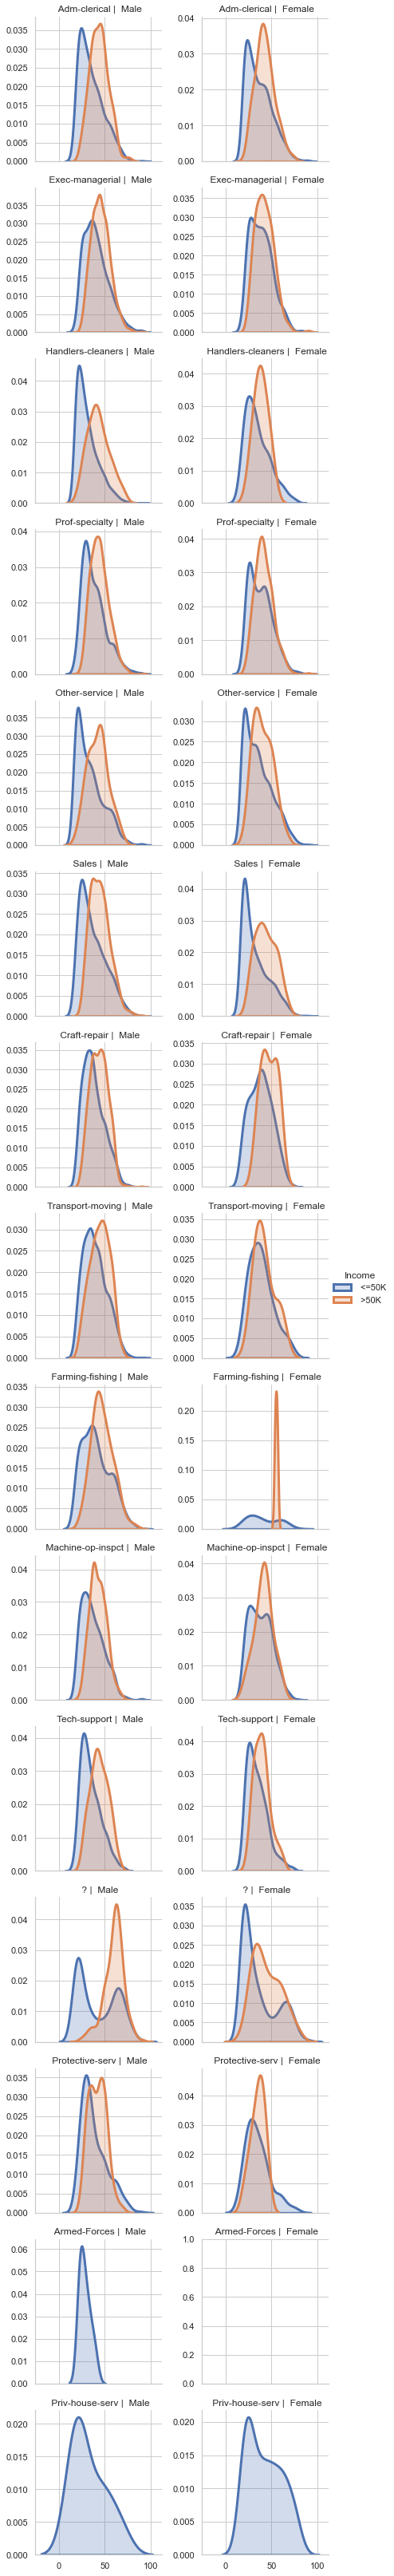

In [20]:
## Testing a KDE plot using previous methods to separate all of the data by occupation, 
## Income (Alternate with Region in Hue), sex, age

## Final results by separating out the different occupations, sex, and their respective 
## incomes. Blue is anyone below 50K and yellow/brown/orange is above 50k

g = sns.FacetGrid(df, col = 'Sex', row = 'Occupation', hue = 'Income', sharey = False)
g.map_dataframe(sns.kdeplot, x = 'Age', lw = 3, shade = True)
g.set_titles(col_template = '{col_name}', row_template = '{row_name}' )
g.add_legend();

In [21]:
## Predicting data and making a test model

## My attempt at building a predictive model. I wasn't able to get it to work 
## but you can see where I was going with this. The design was to separate out categorical columns 
## that I didn't think the data set needed to train on. I wanted to have it train on income initally 
## but was having difficulty getting it to work


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train = df.drop(['Workclass', 'Occupation', 'Education', 'Marital-Status', 
                 'Relationship', 'Race', 'Sex', 'Native-Country', 'Income'], axis = 1)
test = df['fnlwgt']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 0.3, random_state = 2)

In [23]:
regr = LinearRegression()

In [24]:
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
pred = regr.predict(X_test)

In [26]:
regr.score(X_test, y_test)

1.0

In [211]:
## Changing Index to Occupation

## This section is not in use for predictive model. Just a test script for viewing occupation as being the new index

df.set_index('Occupation', inplace=True)
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital-Status,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
Occupation,,,,,,,,,,,,,,
Adm-clerical,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,White,Male,2174,0,40,United States,<=50K
Exec-managerial,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,White,Male,0,0,13,United States,<=50K
Handlers-cleaners,38,Private,215646,HS-grad,9,Divorced,Not-in-family,White,Male,0,0,40,United States,<=50K
Handlers-cleaners,53,Private,234721,11th,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United States,<=50K
Prof-specialty,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\Kyle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


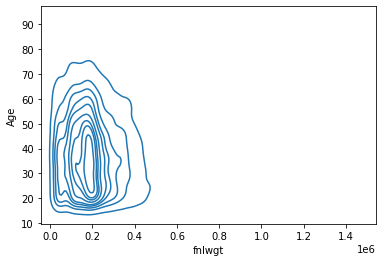

In [223]:
## This is all scratch unusable code I was using to try to test to see what other things could be done. 
## This is also a scrap section of code I either used in previous steps but wanted to hang onto incase 
## I needed to use it again and did not want to retype it.

#costin = df['Age'].plot(kind='hist',bins=25)
#plt.xlabel('Age')
#plt.ylabel('Number of People')
#F_Techfilter = (df['Occupation'] == ' Tech-support') & (df['Sex'] == ' Female') & (df['Capital-Gain'] != 0)

#M_Armedfilter = (df['Occupation'] == ' Armed-Forces') & (df['Sex'] == ' Male') & (df['Capital-Gain'] != 0)

#df.loc[:, df.columns!='Capital-Loss']
#df.loc[:, ~df.columns.isin(['Capital-Loss'])]

#F_Occupation = (df['Sex'] == ' Female') & (df['Capital-Gain'] != 0) & (df['Income'] == ' >50K')
#M_Occupation = (df['Sex'] == ' Male') & (df['Capital-Gain'] != 0) & (df['Income'] == ' >50K')
#print(
#    df[F_Techfilter]
#)

#F_Occupation = df[F_Occupation].loc[:, ~df.columns.isin(['Capital-Loss', 'Hours-Per-Week', 'Education-Num', 'Age', 'fnlwgt'])]
#F_Occupation = F_Occupation.sort_values(by='Capital-Gain', ascending=False)

#M_Occupation = df[M_Occupation].loc[:, ~df.columns.isin(['Capital-Loss', 'Hours-Per-Week', 'Education-Num', 'Age', 'fnlwgt'])]
#M_Occupation = M_Occupation.sort_values(by='Capital-Gain', ascending=False)

#F_Occupation.loc[' Tech-support', 'Capital-Gain'].mean()
#df.loc[F_Occupation]
#plt.plot(df['Age'], F_Occupation)
#plt.plot(F_Occupation, M_Techfilter)
#costin = df[F_Occupation].plot(kind='hist')
#F_Occupation.plot(figsize=(15,10), kind='barh')
#F_Occupation.plot(loglog=True)
#plt.yscale('log')
#plt.show()

#F_Occupation.plot(y = ['Capital-Gain'], kind='line', subplots=True, figsize=(20,10), loglog=False)
#F_Occupation.plot(y = df['Capital-Gain'], kind='line', subplots=False, figsize=(20,10), loglog=True)
#M_Occupation.plot(kind='line', subplots=False, figsize=(20,10), loglog=True)